# **Final Code Training and Testing**

In [1]:
# Import Libraries
import pandas as pd

#Step 2: import data
df = pd.read_csv('/content/admission_predict.csv')

# Step 3: Define X(features) and Y(Target)
y = df['Chance of Admit']
x = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]

# Step 4: train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state = 9598)

## Linear Regression Model

In [2]:
# Model selection
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()

# Train the model
# it is the step where the actually machine learning
model_LR.fit(x_train,y_train)
y_pred_LR = model_LR.predict(x_test)

# Calculate the Accuracy of the Model
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error

error = mean_absolute_error(y_test,y_pred_LR)
percentageError = mean_absolute_percentage_error(y_test, y_pred_LR)
modelAccuracy = (1 - percentageError) * 100


print(f'Model Error: {error}')
print(f'Percentage Error: {percentageError}')
print(f'Model Accuracy: {modelAccuracy}')

Model Error: 0.041375892057603066
Percentage Error: 0.06789110722674732
Model Accuracy: 93.21088927732526


## Decision Tree Model

In [3]:
# model selection
from sklearn.tree import DecisionTreeRegressor
model_DTR = DecisionTreeRegressor()

# train the model
model_DTR.fit(x_train,y_train)

# Predict the result
y_pred_DTR = model_DTR.predict(x_test)

# calculate accuracy
error_DTR = mean_absolute_percentage_error(y_test,y_pred_DTR)
accuracy_DTR = (1 - error_DTR) * 100

print(f'Error: {error_DTR}')
print(f'Model Accuracy: {accuracy_DTR}')

Error: 0.10826778610216309
Model Accuracy: 89.17322138978369


## Random Forest

In [4]:
# model selection
from sklearn.ensemble import RandomForestRegressor
model_RFR = RandomForestRegressor()

# train the model
model_RFR.fit(x_train,y_train)

# Predict the result of model
y_pred4 = model_RFR.predict(x_test)

# Calculate error and accuracy
error_RFR = mean_absolute_percentage_error(y_test,y_pred4)
accuracy_RFR = (1-error_RFR)*100

print(f'Error: {error_RFR}')
print(f'Model Accuracy: {accuracy_RFR}')

Error: 0.07559045260421343
Model Accuracy: 92.44095473957866


# **Model Evaluation and Visualization**

In [5]:
# Comparision table for Above models and its accuracy

models = ["Linear Regression", "Decision Tree", "Random Forest"]
accuracies = [modelAccuracy, accuracy_DTR, accuracy_RFR]

table = pd.DataFrame({"Model": models, "Accuracy": accuracies})
table.head(3)

,Model,Accuracy
0,Linear Regression,93.210889
1,Decision Tree,89.173221
2,Random Forest,92.440955


## Visulization

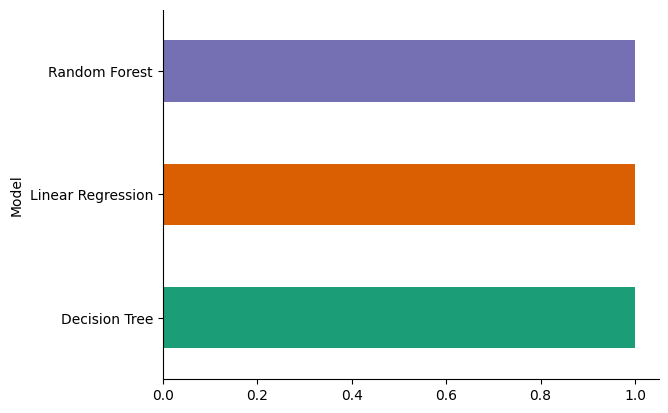

In [6]:
# @title Model

from matplotlib import pyplot as plt
import seaborn as sns
table.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

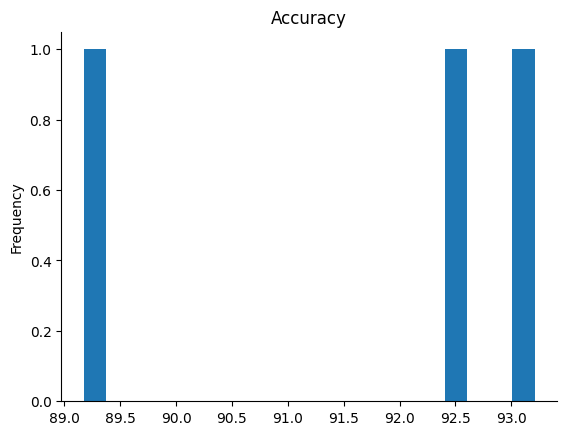

In [7]:
# @title Accuracy

from matplotlib import pyplot as plt
table['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Model', ylabel='Accuracy'>

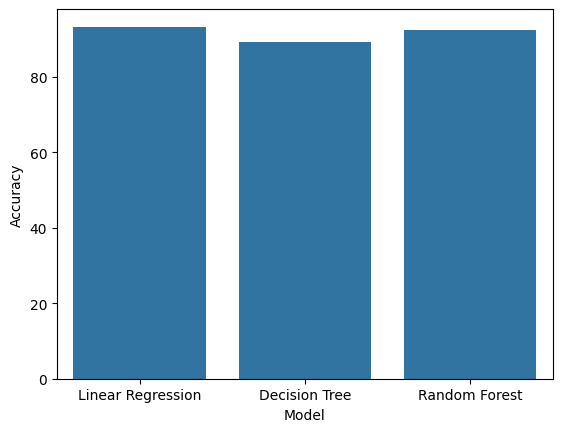

In [8]:
# @title Model Accuracy Comparison

sns.barplot(x='Model', y='Accuracy', data=table)

<Axes: xlabel='Model', ylabel='Accuracy'>

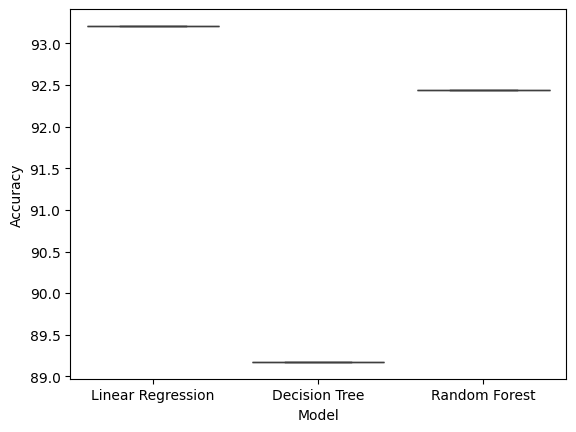

In [9]:
# @title Highest and Lowest Accuracy Models

sns.boxplot(x = 'Model', y = 'Accuracy', data = table)